## Instalação das bibliotecas

In [70]:
%pip install plotly -q 
%pip install matplotlib -q
%pip install nbformat -q
%pip install seaborn -q

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Carregamento dos dados

In [ ]:
df = pd.read_excel("Base Vendas.xlsx")

##  Análise Exploratória de Dados (AED)

In [44]:
df.head()

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,cod_vendedor,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda,valor_venda,qtd_vendas,mes,ano
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,1009,Ana Teixeira,SP8821,São Paulo,São Paulo,2012-10-04,679.00,1,10,2012
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,2012-01-01,832.00,1,1,2012
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,2012-02-02,790.00,1,2,2012
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1003,Mateus Gonçalves,SP8821,São Paulo,São Paulo,2012-03-03,765.32,1,3,2012
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,1004,Artur Moreira,SP8821,São Paulo,São Paulo,2012-04-04,459.89,1,4,2012


In [35]:
df.tail()

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,cod_vendedor,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda,valor_venda
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1002,André Pereira,R1295,Rio de Janeiro,Rio de Janeiro,2015-09-23,1234.0
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1002,André Pereira,R1295,Rio de Janeiro,Rio de Janeiro,2015-10-24,1234.0
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,1008,Aline Sutter,R1295,Rio de Janeiro,Rio de Janeiro,2015-11-25,1230.0
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1002,André Pereira,R1295,Rio de Janeiro,Rio de Janeiro,2015-11-26,1234.0
456,SKU-0000457,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1002,André Pereira,R1295,Rio de Janeiro,Rio de Janeiro,2015-11-27,1234.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cod_produto        457 non-null    object        
 1   nome_produto       457 non-null    object        
 2   categoria_produto  457 non-null    object        
 3   segmento_produto   457 non-null    object        
 4   marca_produto      457 non-null    object        
 5   cod_vendedor       457 non-null    int64         
 6   nome_vendedor      457 non-null    object        
 7   cod_loja           457 non-null    object        
 8   cidade_loja        457 non-null    object        
 9   estado_loja        457 non-null    object        
 10  data_venda         457 non-null    datetime64[ns]
 11  valor_venda        457 non-null    float64       
 12  qtd_vendas         457 non-null    int64         
 13  mes                457 non-null    int32         
 14  ano       

In [36]:
df.describe()

,cod_vendedor,data_venda,valor_venda
count,457.000000,457,457.000000
mean,1004.091904,2014-07-15 22:09:42.932166400,8491.746630
min,1001.000000,2012-01-01 00:00:00,12.000000
25%,1002.000000,2013-08-02 00:00:00,167.000000
50%,1004.000000,2014-12-04 00:00:00,713.000000
75%,1006.000000,2015-06-02 00:00:00,1234.000000
max,1009.000000,2015-12-02 00:00:00,134587.000000
std,2.456704,NaN,27609.700052


In [66]:
df['qtd_vendas']=len(df)
df.groupby('cod_vendedor')['qtd_vendas'].sum()
df.groupby('nome_vendedor')['valor_venda'].mean()
df['mes'] = df['data_venda'].dt.month
df['ano'] = df['data_venda'].dt.year

In [82]:
faturamento = df['valor_venda'].sum()
qtd_vendas = len(df)
Ticket_medio = df['valor_venda'].mean()

In [83]:
df_kpi_ano = df.groupby('ano').agg(
    faturamento=('valor_venda', 'sum'),
    qtd_vendas=('valor_venda', 'count'),
    ticket_medio=('valor_venda', 'mean')
).reset_index()

df_kpi_ano

,ano,faturamento,qtd_vendas,ticket_medio
0,2012,1368323.21,39,35085.210513
1,2013,1759509.00,115,15300.078261
2,2014,136539.00,77,1773.233766
3,2015,616357.00,226,2727.243363


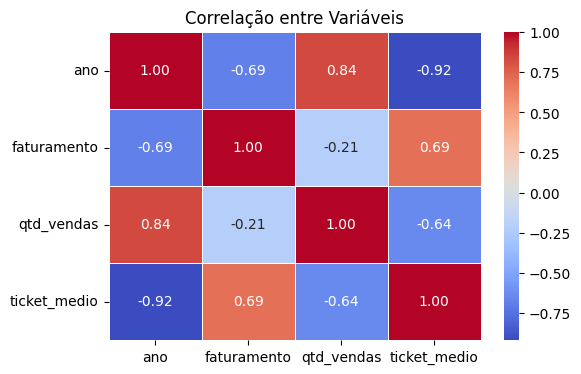

In [84]:
# Matriz de correlação
corr = df_kpi_ano.corr()
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,        # mostra os valores
    cmap='coolwarm',   # escala de cores
    fmt=".2f",         # 2 casas decimais
    linewidths=0.5
)

plt.title('Correlação entre Variáveis')
plt.show()

In [73]:
df_corr = df[['valor_venda', 'ano']]
df_corr.corr()


,valor_venda,ano
valor_venda,1.000000,-0.317262
ano,-0.317262,1.000000


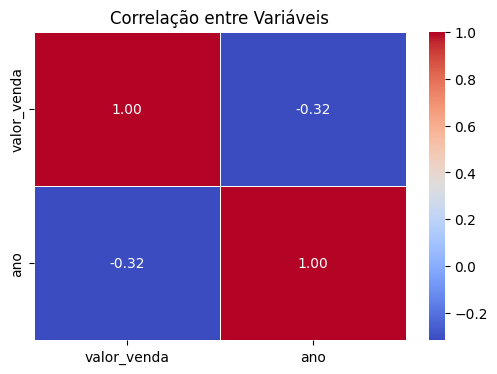

In [74]:
# Matriz de correlação
corr = df_corr.corr()
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,        # mostra os valores
    cmap='coolwarm',   # escala de cores
    fmt=".2f",         # 2 casas decimais
    linewidths=0.5
)

plt.title('Correlação entre Variáveis')
plt.show()


In [48]:
df_agg = df.groupby('nome_vendedor').agg({
    'valor_venda': 'sum',
    'cod_produto': 'count'
}).rename(columns={'cod_produto': 'qtd_vendas'})

df_agg.corr()


,valor_venda,qtd_vendas
valor_venda,1.000000,0.404876
qtd_vendas,0.404876,1.000000


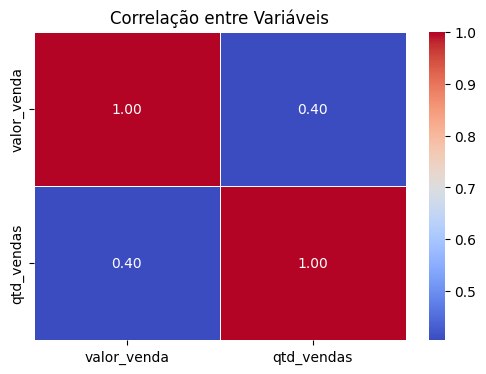

In [72]:
# Matriz de correlação
corr = df_agg.corr()
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,        # mostra os valores
    cmap='coolwarm',   # escala de cores
    fmt=".2f",         # 2 casas decimais
    linewidths=0.5
)

plt.title('Correlação entre Variáveis')
plt.show()

In [77]:
df_ano = df.groupby('ano')['valor_venda'].mean().reset_index()
df_ano


,ano,valor_venda
0,2012,35085.210513
1,2013,15300.078261
2,2014,1773.233766
3,2015,2727.243363


In [78]:
vendas_segmento = df.groupby(['segmento_produto']).agg({'valor_venda':'sum'})
vendas_segmento

,valor_venda
segmento_produto,
Corporativo,1244267.00
Doméstico,2623906.21
Industrial,12555.00


In [69]:
fig_rosca = px.pie(
    vendas_segmento,
    values="valor_venda",
    names=vendas_segmento.index,
    title="Vendas por Segmento",
    hole=0.5  # transforma em rosca
)
fig_rosca.update_layout(
    width=600,
    height=450
)

fig_rosca.show()



In [55]:
vendas_estado = df.groupby(['estado_loja']).size().reset_index(name='Qtd_Vendas').sort_values(by='Qtd_Vendas',ascending=True)
vendas_estado

,estado_loja,Qtd_Vendas
0,Bahia,4
3,Paraná,7
1,Espírito Santo,26
2,Minas Gerais,40
4,Rio de Janeiro,166
5,São Paulo,214
